In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "Qwen/Qwen3-14B"

# load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True,
    device_map={ "": 0 },            # map *all* modules to cuda:0
    #max_memory={ 0: "45GB" },        # (optional) cap VRAM usage on GPU 0
    torch_dtype=torch.float16
)

model.eval()


tokenizer_config.json:   0%|          | 0.00/9.68k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/3.84G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Qwen3ForCausalLM(
  (model): Qwen3Model(
    (embed_tokens): Embedding(151936, 5120)
    (layers): ModuleList(
      (0-39): 40 x Qwen3DecoderLayer(
        (self_attn): Qwen3Attention(
          (q_proj): Linear(in_features=5120, out_features=5120, bias=False)
          (k_proj): Linear(in_features=5120, out_features=1024, bias=False)
          (v_proj): Linear(in_features=5120, out_features=1024, bias=False)
          (o_proj): Linear(in_features=5120, out_features=5120, bias=False)
          (q_norm): Qwen3RMSNorm((128,), eps=1e-06)
          (k_norm): Qwen3RMSNorm((128,), eps=1e-06)
        )
        (mlp): Qwen3MLP(
          (gate_proj): Linear(in_features=5120, out_features=17408, bias=False)
          (up_proj): Linear(in_features=5120, out_features=17408, bias=False)
          (down_proj): Linear(in_features=17408, out_features=5120, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen3RMSNorm((5120,), eps=1e-06)
        (post_attention_layernorm): 

In [2]:
# prepare the model input
prompt = "Give me a short introduction to large language model."
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True # Switches between thinking and non-thinking modes. Default is True.
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

# conduct text completion
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() 

# parsing thinking content
try:
    # rindex finding 151668 (</think>)
    index = len(output_ids) - output_ids[::-1].index(151668)
except ValueError:
    index = 0

thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

print("thinking content:", thinking_content)
print("content:", content)

thinking content: <think>
Okay, the user asked for a short introduction to large language models. Let me start by recalling the key points I need to cover. First, what exactly is a large language model? They're AI systems trained on massive datasets to understand and generate human-like text. I should mention their capabilities, like answering questions, writing stories, coding, etc.

I need to explain how they work briefly. Maybe touch on the training process, like using vast amounts of text data to learn patterns and relationships between words. Also, mention the architecture, such as transformer models, but keep it simple since the user wants a short intro.

Applications are important too. They're used in chatbots, content creation, translation, and more. It's good to highlight their versatility. Also, note the challenges, like the need for computational resources and potential biases in the data they're trained on.

Wait, the user might be a beginner, so avoid jargon. Make sure the

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

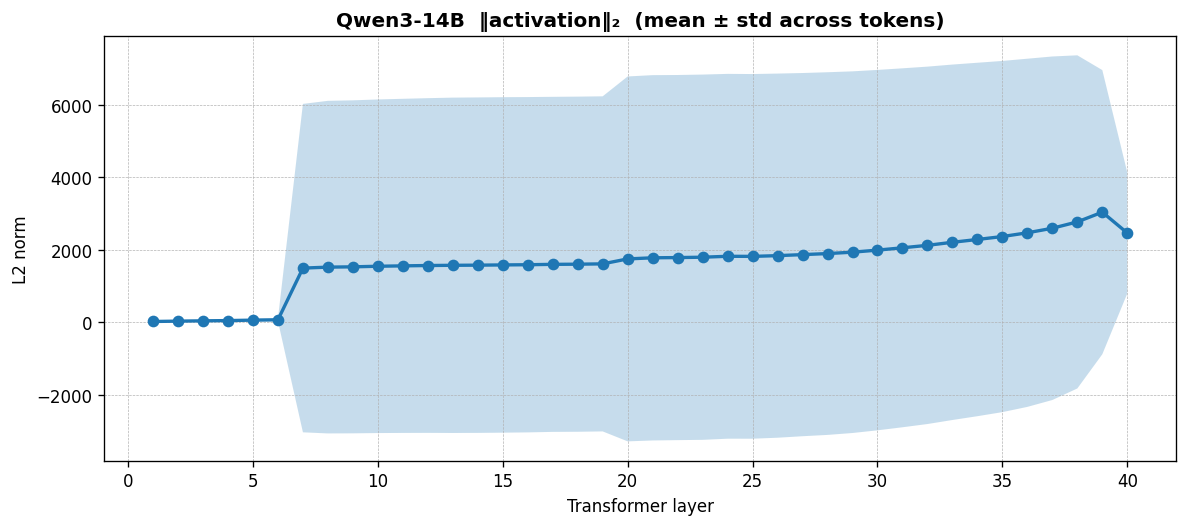

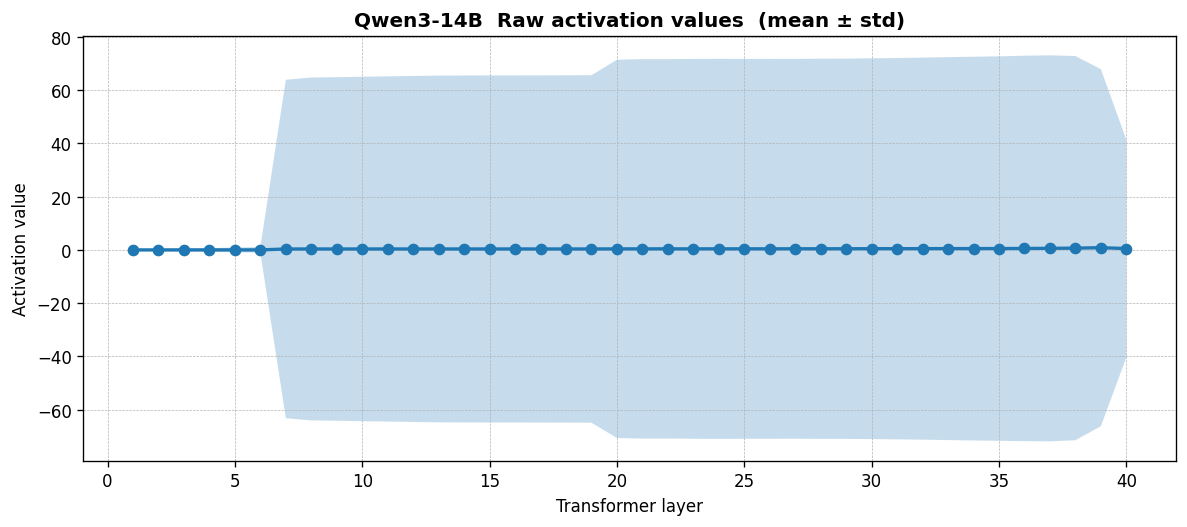

In [1]:
# ─────────────────────────────────────────────────────────────────────────────
# Activation-stat collector for Qwen/Qwen3-14B
# ─────────────────────────────────────────────────────────────────────────────
#   • Single-GPU (cuda:0) assumed.  Change device_map / CUDA_VISIBLE_DEVICES
#     if you wish.
#   • Requires:  transformers >= 4.39, torch >= 2.1, matplotlib.
# ----------------------------------------------------------------------------

import torch, matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM

MODEL_NAME = "Qwen/Qwen3-14B"
DEVICE      = "cuda:0"                # hard-pin all weights + data

# ── Load model & tokenizer ───────────────────────────────────────────────────
tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME, trust_remote_code=True
)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    trust_remote_code=True,
    device_map={ "": 0 },             # everything on cuda:0
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
).eval()

# ── Container for stats ──────────────────────────────────────────────────────
layer_l2_means, layer_l2_stds   = [], []
layer_raw_means, layer_raw_stds = [], []

def _get_hidden(out):
    # 1️⃣ plain tensor
    if isinstance(out, torch.Tensor):
        return out
    # 2️⃣ tuple/list – first item is the tensor
    if isinstance(out, (tuple, list)):
        return out[0]
    # 3️⃣ dataclass (e.g. BaseModelOutput) – use .last_hidden_state
    if hasattr(out, "last_hidden_state"):
        return out.last_hidden_state
    raise TypeError(f"Unrecognised output type: {type(out)}")

def hook(_, __, output):
    h = _get_hidden(output).float()        # cast to fp32 for stable stats
    # ‖x‖₂ per token
    l2_tok = h.norm(p=2, dim=-1).view(-1)
    layer_l2_means.append(l2_tok.mean().item())
    layer_l2_stds .append(l2_tok.std ().item())

    flat = h.view(-1)
    layer_raw_means.append(flat.mean().item())
    layer_raw_stds .append(flat.std ().item())

# Register hook on each Transformer block (they live in model.model.layers)
handles = [block.register_forward_hook(hook) 
           for block in model.model.layers]

# ── Run a sample prompt ──────────────────────────────────────────────────────
PROMPT = "Give me a short introduction to large language models."
inputs = tokenizer(PROMPT, return_tensors="pt").to(DEVICE)

with torch.no_grad():
    _ = model(**inputs, use_cache=False)

# Remove hooks to free resources
for h in handles: h.remove()

# ── Plotting helper ──────────────────────────────────────────────────────────
def pretty_plot(y_mean, y_std, title, ylabel):
    x = range(1, len(y_mean)+1)
    plt.figure(figsize=(10,4.5), dpi=120)
    plt.fill_between(x,
                     [m-s for m,s in zip(y_mean,y_std)],
                     [m+s for m,s in zip(y_mean,y_std)],
                     alpha=0.25)
    plt.plot(x, y_mean, marker='o', linewidth=2)
    plt.title(title, fontweight="bold")
    plt.xlabel("Transformer layer")
    plt.ylabel(ylabel)
    plt.grid(True, linestyle="--", linewidth=0.4)
    plt.tight_layout()

# ── Figure 1: L2 norm stats ──────────────────────────────────────────────────
pretty_plot(layer_l2_means, layer_l2_stds,
            "Qwen3-14B  ‖activation‖₂  (mean ± std across tokens)",
            "L2 norm")

# ── Figure 2: Raw activation value stats ─────────────────────────────────────
pretty_plot(layer_raw_means, layer_raw_stds,
            "Qwen3-14B  Raw activation values  (mean ± std)",
            "Activation value")

plt.show()